STEPS:
#1.data  collection
#2.data preparation(importing libraries,EDA exploratory  data analysis):
After importing the data we have  used some basic pandas functions  to get  to  know  more about the data,such as Head(),tail(),describe()->for  satistical analysis ,info()  etc.


#3.data  exploration:
we have  used some  plots to get understand  our  data is  like  clount  of  our  target  variable,histogram  to  check  whther variables  are  normally  distributed  or  not,unique  values present  in a  variables.

#4.data preprocessing:
here  check  any  null values,outliers or  unwanted  values.if   any  thing not having  so  after  create dummy variables  use  pd.get_dummies(),to  transform our categorical variables  to  numerical  values(0/1).

#5.data  transformation:
to   transform  variables/used to brimg  all  variables  tothe  same  scale use  StandardScaler()/Normalisation().

#6.data  modeling:
we  are  split data to  train_test_split(80/20),after  use  machine  lerning algorithms .use  varied parameters across  each model to  imrove their scores.

#STEPS:
#1 DATA GATHERING
#2 DATA PREPARATION
#3 DATA PREPROCESSING
#4 DATA TRANSFORMATION
#5 MODEL SELECTION(BUILDING)
#6 MODEL EVALUATION

#heart disease  whether the person has heart disease or not
# It  is a classification problem
supervised:
classification,regression

unsupervised:
clustering,dimensionality reduction

semi supervised

reinforcement

In [143]:
#IMPORT LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
#from sklearn import  tree
#from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

from matplotlib.cm import rainbow
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams

#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression




In [144]:
#DATA PREPAREATION
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.00,2,0,2,0.85
1021,60,1,0,125,258,0,0,141,1,2.80,1,1,3,0.40
1022,47,1,0,110,275,0,0,118,1,1.00,1,1,2,0.15
1023,50,0,0,110,254,0,0,159,0,0.00,2,0,2,0.82


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [146]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.00,2,0,2,0.85
1021,60,1,0,125,258,0,0,141,1,2.80,1,1,3,0.40
1022,47,1,0,110,275,0,0,118,1,1.00,1,1,2,0.15
1023,50,0,0,110,254,0,0,159,0,0.00,2,0,2,0.82
1024,54,1,0,120,188,0,1,113,0,1.40,1,1,3,0.39


In [147]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object

In [6]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.size

14350

In [148]:
df.shape

(1025, 14)

In [149]:
pd.set_option("display.float", "{:.2f}".format) #format="%.2f"
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.54
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.29
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.10
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.26
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,0.71
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,0.81
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,0.90


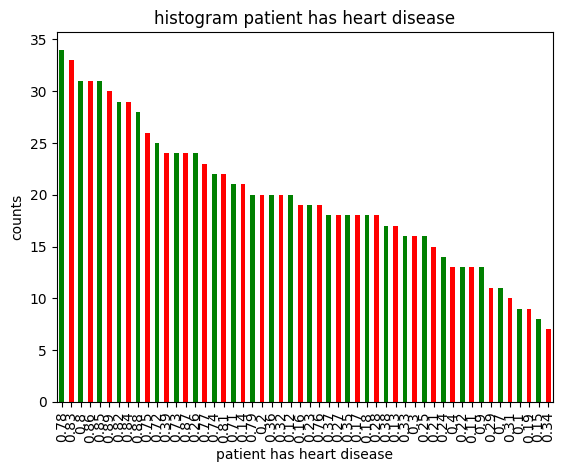

In [150]:
#data preprocessing
target=df['target']
independent=df.drop(columns=['target'])
#data  exploration
df.target.value_counts().plot(kind="bar",color=['green','red'])
plt.xlabel("patient has heart disease")
plt.ylabel("counts")
plt.title("histogram patient has heart disease")
plt.show()

In [151]:
#check whether is  any null values or not

#df.isnull().sum()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

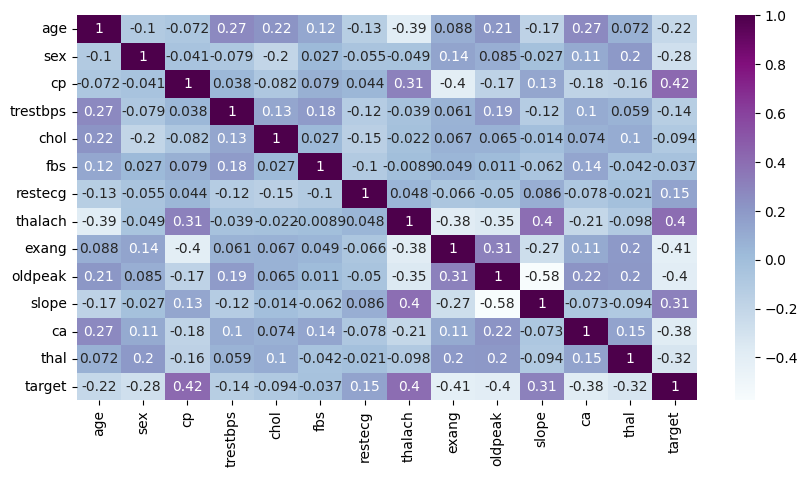

In [152]:

#Corelation Matrix

corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="BuPu")


<Axes: title={'center': 'correlation with target'}>

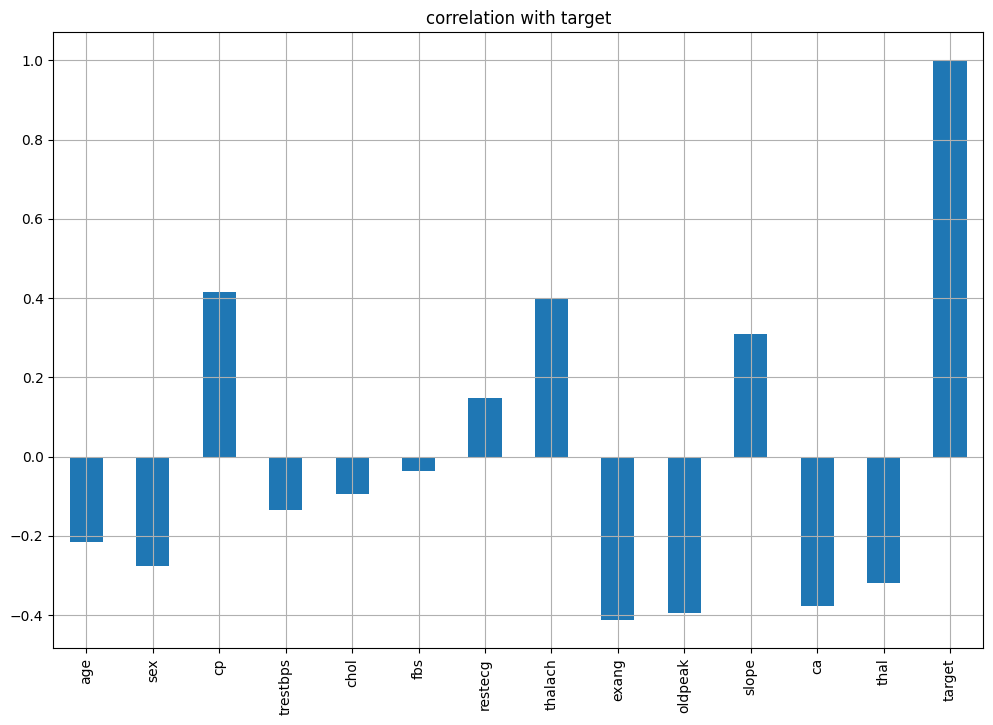

In [153]:
df.corrwith(df.target).plot(kind='bar',grid=True,figsize=(12,8),title="correlation with target")

In [154]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#pairplot is collection of  different  plots

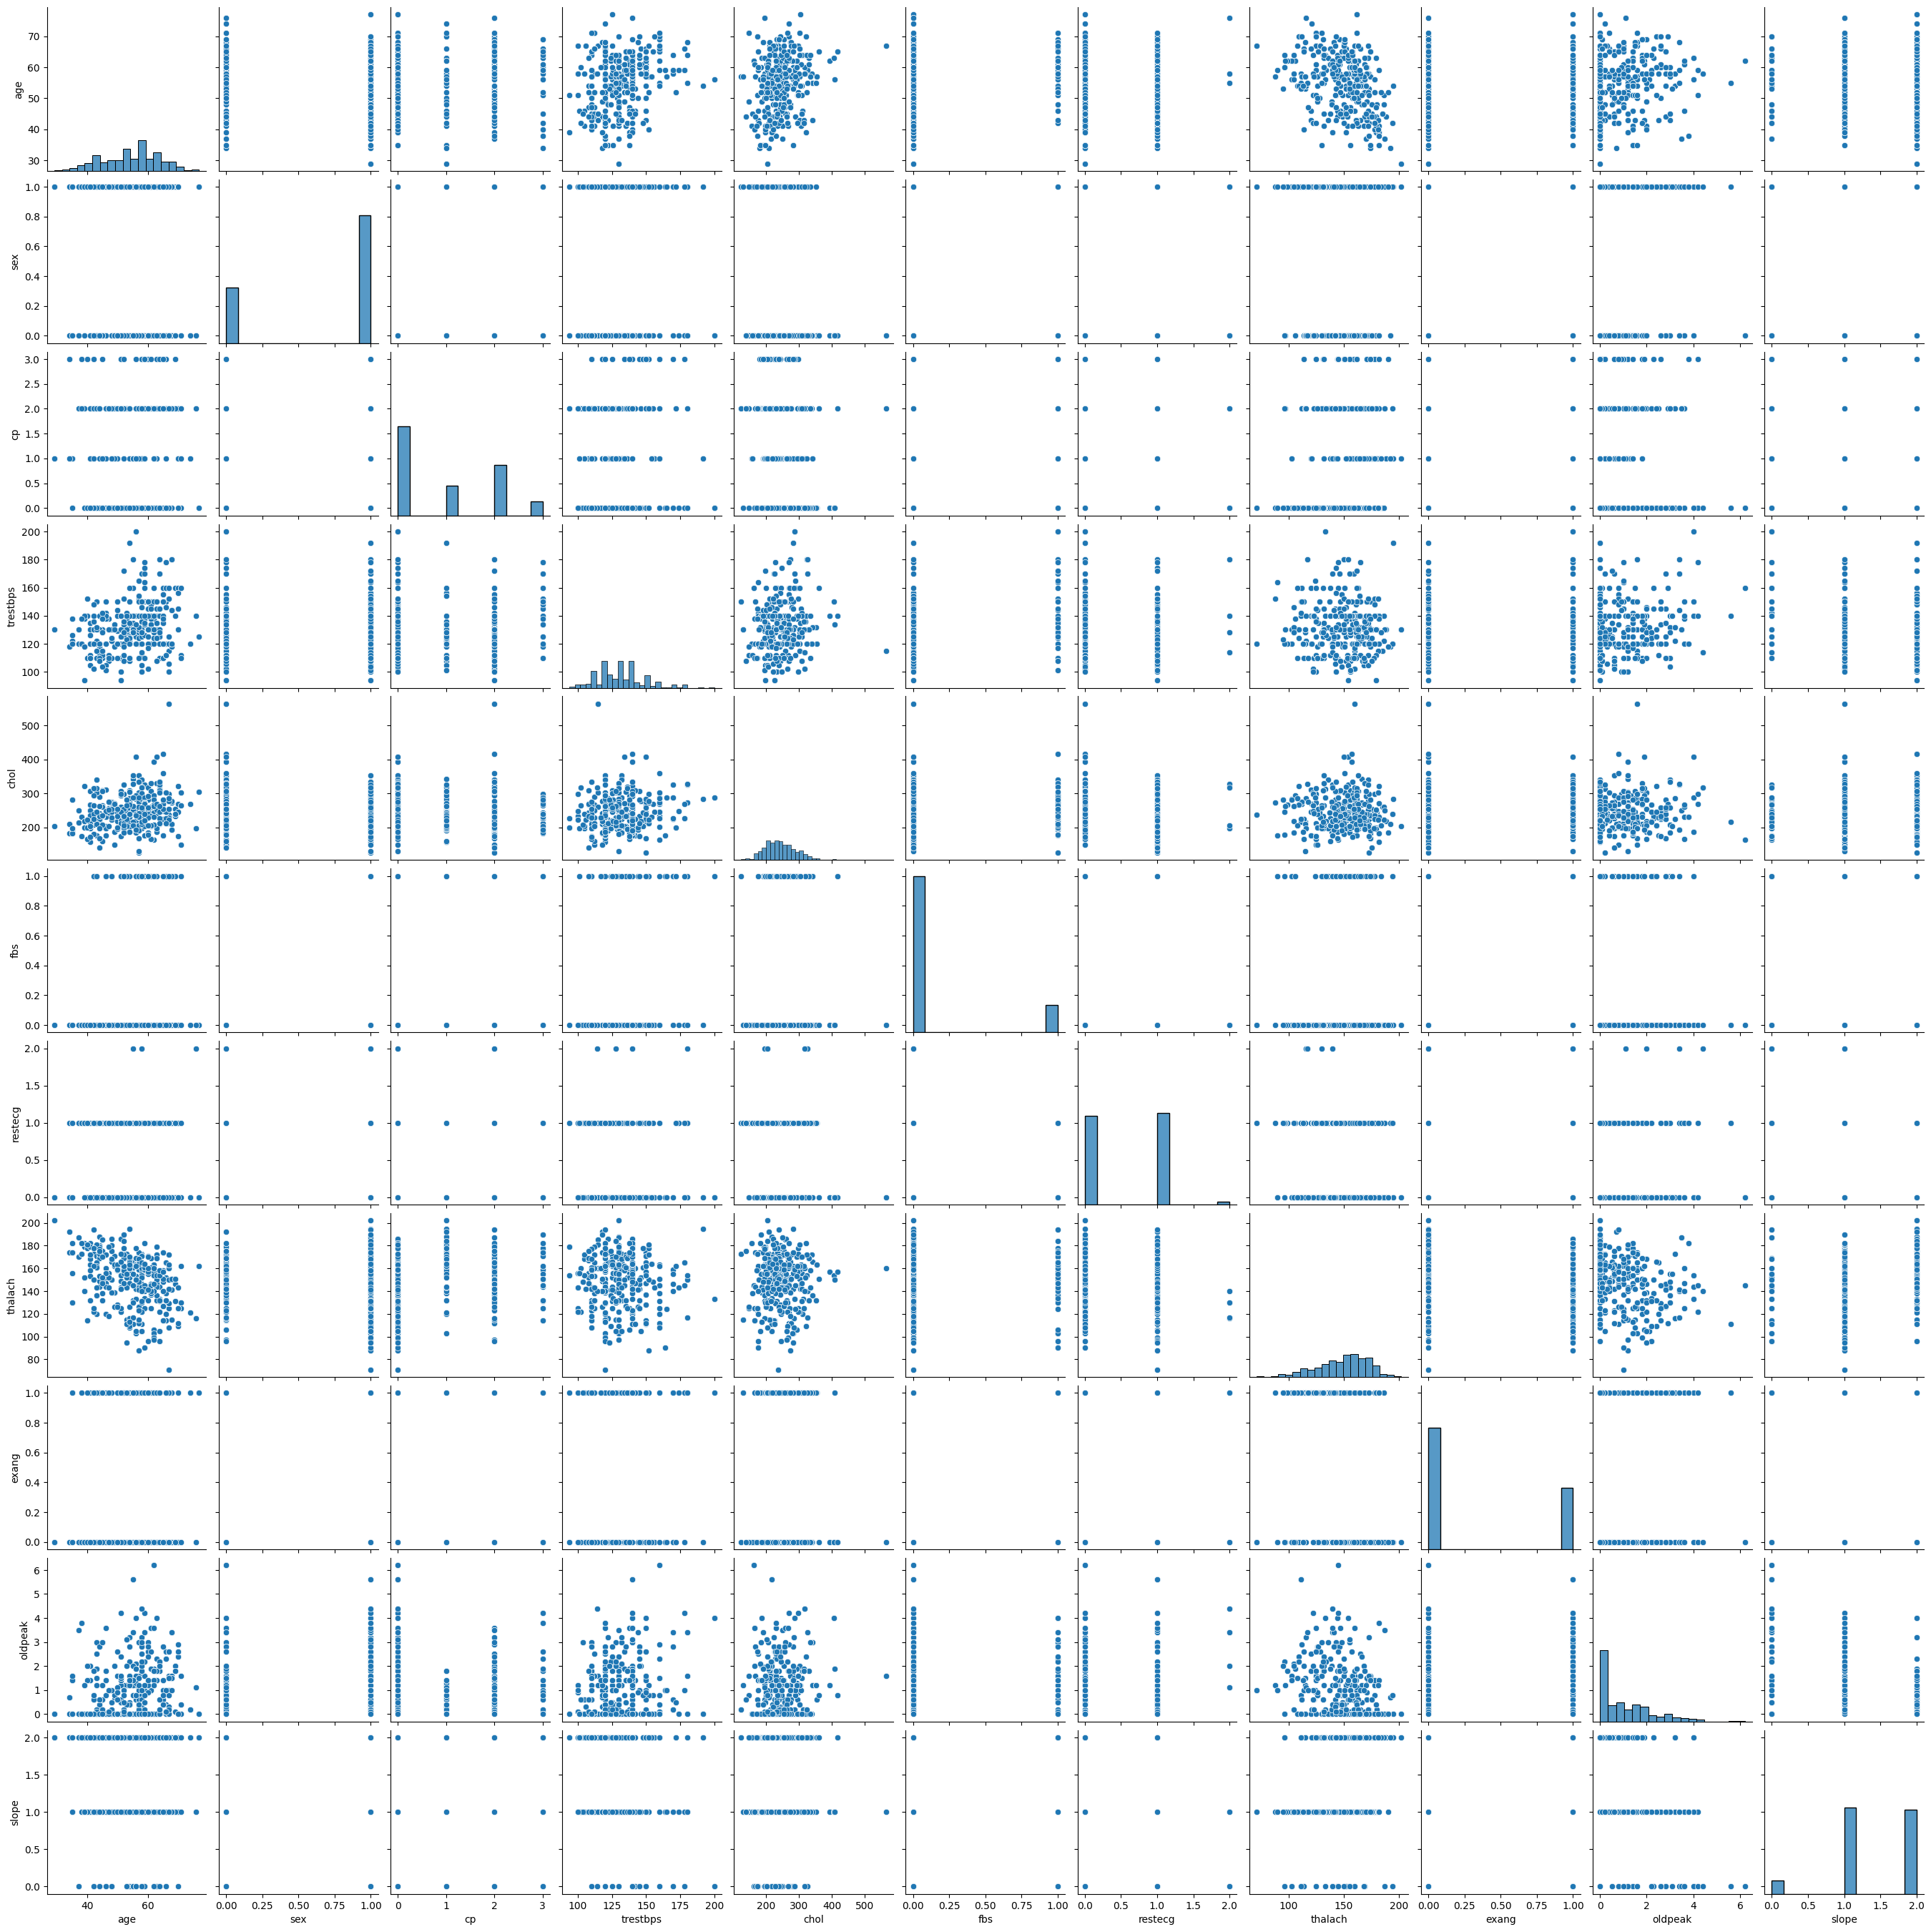

In [158]:
num_val=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']]

sns.pairplot(num_val)

In [159]:
#target=df['target']
#independent=df.drop(columns=['target'])

#data preprocessing
df=pd.get_dummies(independent,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach'])

In [160]:
df.head()

,exang,oldpeak,slope,ca,thal,age_29,age_34,age_35,age_37,age_38,...,thalach_184,thalach_185,thalach_186,thalach_187,thalach_188,thalach_190,thalach_192,thalach_194,thalach_195,thalach_202
0,0,1.00,2,2,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,3.10,0,0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.60,0,0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.00,2,1,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1.90,1,3,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
#data  transformation
sc=StandardScaler()
col=['exang', 'oldpeak', 'slope']
df[col]=sc.fit_transform(df[col])

In [162]:
df.head()

,exang,oldpeak,slope,ca,thal,age_29,age_34,age_35,age_37,age_38,...,thalach_184,thalach_185,thalach_186,thalach_187,thalach_188,thalach_190,thalach_192,thalach_194,thalach_195,thalach_202
0,-0.71,-0.06,1.00,2,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.40,1.73,-2.24,0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.40,1.30,-2.24,0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.71,-0.91,1.00,1,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.71,0.71,-0.62,3,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [163]:
df.describe()

,exang,oldpeak,slope,ca,thal
count,1025.00,1025.00,1025.00,1025.00,1025.00
mean,-0.00,-0.00,0.00,0.75,2.32
std,1.00,1.00,1.00,1.03,0.62
min,-0.71,-0.91,-2.24,0.00,0.00
25%,-0.71,-0.91,-0.62,0.00,2.00
50%,-0.71,-0.23,-0.62,0.00,2.00
75%,1.40,0.62,1.00,1.00,3.00
max,1.40,4.37,1.00,4.00,3.00


In [164]:
#MODEL  TRAIN
x=df
y=target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Split the dataset
# X = df  # Features
# y = target  # No need to reassign 'y' here as it's already defined above
# Convert 'y' to numeric type if it's not already
Y_train = pd.to_numeric(Y_train, errors='coerce')
# Then apply the threshold to create discrete classes for your target variable
Y_train = (Y_train > 0.5).astype(int)

# Do the same for Y_test
Y_test = pd.to_numeric(Y_test, errors='coerce')
Y_test = (Y_test > 0.5).astype(int)


In [165]:
x

,exang,oldpeak,slope,ca,thal,age_29,age_34,age_35,age_37,age_38,...,thalach_184,thalach_185,thalach_186,thalach_187,thalach_188,thalach_190,thalach_192,thalach_194,thalach_195,thalach_202
0,-0.71,-0.06,1.00,2,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.40,1.73,-2.24,0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.40,1.30,-2.24,0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.71,-0.91,1.00,1,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.71,0.71,-0.62,3,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.40,-0.91,1.00,0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1021,1.40,1.47,-0.62,1,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1022,1.40,-0.06,-0.62,1,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1023,-0.71,-0.91,1.00,0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [166]:
y

0      0.23
1      0.37
2      0.24
3      0.28
4      0.21
       ... 
1020   0.85
1021   0.40
1022   0.15
1023   0.82
1024   0.39
Name: target, Length: 1025, dtype: float64

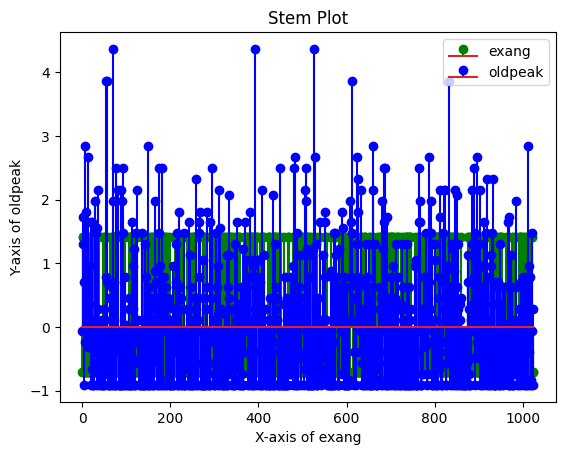

In [167]:
#STEMPLOT
# Assuming 'df' contains the features you want to plot against 'y'
# Choose a specific column from 'df' to use as 'x'
x_values = df['exang']  # Replace 'some_column_name' with the actual column
y_values=df['oldpeak']
plt.stem(x_values,linefmt='g-', markerfmt='go' ,label='exang')# green stem plot for x_values
plt.stem(y_values,linefmt='b-', markerfmt='bo',label='oldpeak')  # blue  stem plot for y_values
plt.title("Stem Plot")
plt.xlabel("X-axis of exang")
plt.ylabel("Y-axis of oldpeak")
plt.legend()
plt.show()

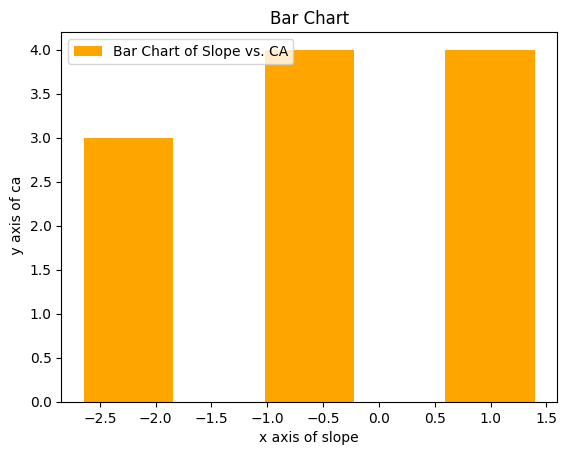

In [60]:
#bar chart
x_values = df['slope']  # Replace 'some_column_name' with the actual column
y_values=df['ca']
plt.bar(x_values,y_values, color='orange',label='Bar Chart of Slope vs. CA')
plt.title("Bar Chart")
plt.xlabel("x axis of slope")
plt.ylabel(" y axis of ca")
plt.legend()
plt.show()

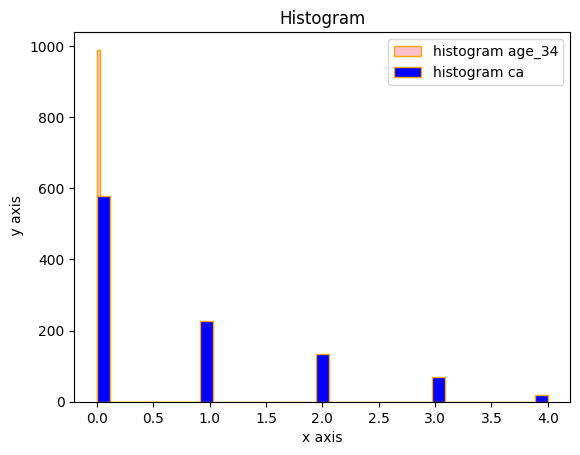

In [80]:
x=df['age_44'].astype(float) # Convert x to numeric type if it's boolean]
y=df['ca']
plt.hist(x, bins=35, edgecolor='orange',color='pink', label='histogram age_34')
plt.hist(y, bins=35, edgecolor='orange',color='blue', label='histogram ca')
plt.title("Histogram")
plt.xlabel("x axis")
plt.ylabel(" y axis")
plt.legend()
plt.show()

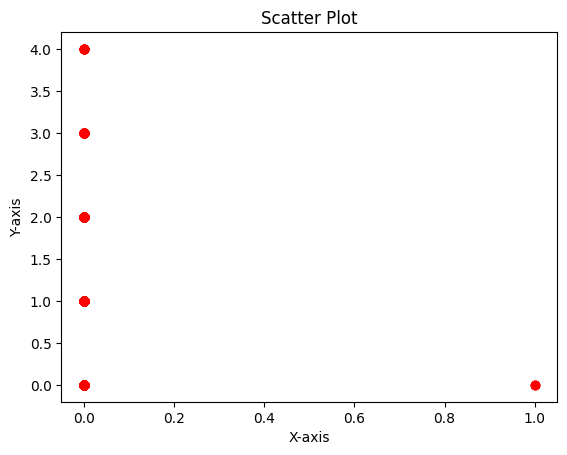

In [57]:
x=df['thalach_184'].astype(float)
y=df['ca']
plt.scatter(x, y, color='red')
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


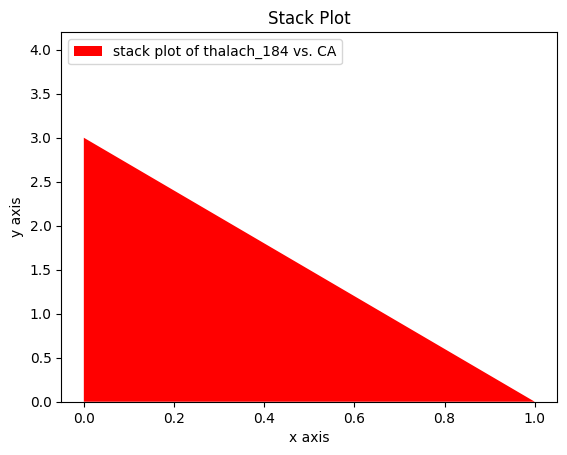

In [93]:
x = df['thalach_184'].astype(float)
y = df['ca']
plt.stackplot(x, y, colors='red') # Pass both x and y in a single call
plt.title("Stack Plot")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend([ 'stack plot of thalach_184 vs. CA'],loc='upper left')
plt.show()

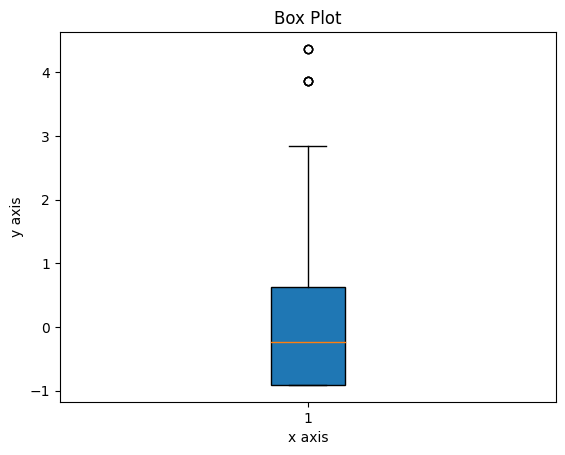

In [99]:
plt.boxplot(y_values, vert=True, patch_artist=True,) #one value should pass
plt.title("Box Plot")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

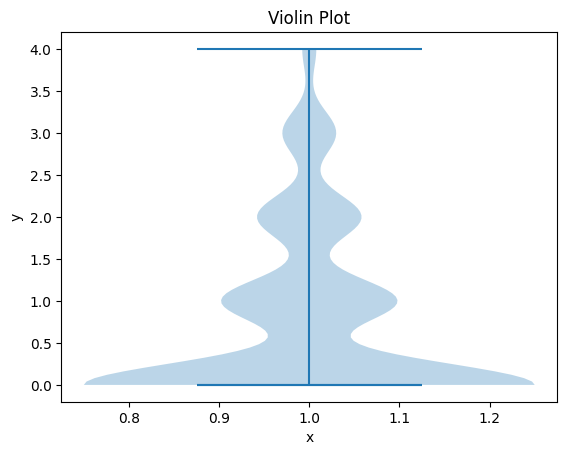

In [125]:

plt.violinplot(x, showmeans=False, showmedians=True)
plt.title("Violin Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [168]:
# Custom score function  for train and  test split
def score(model, X_train, X_test, Y_train, Y_test, train=True):
    if train:
        Y_pred = model.predict(X_train)
        print("Train Results:\n")
        print('-----------------------------------------------')
        print(f"Accuracy: {accuracy_score(Y_train,Y_pred)*100:.2f}%")
        print('---------------------------------------------')
        print(f"Confusion Matrix: \n{confusion_matrix(Y_train,Y_pred)}\n")
        print('---------------------------------------------')
        print(f"Classification Report: \n {classification_report(Y_train,Y_pred)}\n")
        print("------------------------------------------------")
    else:
        Y_pred = model.predict(X_test)
        print("Test Results:\n")
        print('-----------------------------------------------')
        print(f"Accuracy: {accuracy_score(Y_test,Y_pred)*100 :.2f}%")
        print('---------------------------------------------')
        print(f"Confusion Matrix: \n{confusion_matrix(Y_test,Y_pred)}\n")
        print('---------------------------------------------')
        print(f"Classification Report: \n {classification_report(Y_test,Y_pred)}\n")
        print("------------------------------------------------")

#logistic regression

In [169]:
# Define the logistic regression model
lr = LogisticRegression(solver='liblinear')
# Train the model
lr.fit(X_train, Y_train)
# Evaluate the model
score(lr, X_train, X_test, Y_train, Y_test, train=True)
score(lr, X_train, X_test, Y_train, Y_test, train=False)

Train Results:

-----------------------------------------------
Accuracy: 96.71%
---------------------------------------------
Confusion Matrix: 
[[386  15]
 [ 12 407]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       401
           1       0.96      0.97      0.97       419

    accuracy                           0.97       820
   macro avg       0.97      0.97      0.97       820
weighted avg       0.97      0.97      0.97       820


------------------------------------------------
Test Results:

-----------------------------------------------
Accuracy: 96.10%
---------------------------------------------
Confusion Matrix: 
[[ 93   5]
 [  3 104]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        98
           1       0.95      0.97

#SUPPRT VECTOR CLASSIFICATION

In [170]:
svc=SVC()
svc.fit(X_train,Y_train)
score(svc, X_train, X_test, Y_train, Y_test, train=True)
score(svc, X_train, X_test, Y_train, Y_test, train=False)

Train Results:

-----------------------------------------------
Accuracy: 97.93%
---------------------------------------------
Confusion Matrix: 
[[389  12]
 [  5 414]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       401
           1       0.97      0.99      0.98       419

    accuracy                           0.98       820
   macro avg       0.98      0.98      0.98       820
weighted avg       0.98      0.98      0.98       820


------------------------------------------------
Test Results:

-----------------------------------------------
Accuracy: 98.54%
---------------------------------------------
Confusion Matrix: 
[[ 96   2]
 [  1 106]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.98      0.99

#NAIVE BAYES

In [171]:
guassian=GaussianNB()
guassian.fit(X_train,Y_train)
score(guassian, X_train, X_test, Y_train, Y_test, train=True)
score(guassian, X_train, X_test, Y_train, Y_test, train=False)

Train Results:

-----------------------------------------------
Accuracy: 88.29%
---------------------------------------------
Confusion Matrix: 
[[398   3]
 [ 93 326]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       401
           1       0.99      0.78      0.87       419

    accuracy                           0.88       820
   macro avg       0.90      0.89      0.88       820
weighted avg       0.90      0.88      0.88       820


------------------------------------------------
Test Results:

-----------------------------------------------
Accuracy: 88.78%
---------------------------------------------
Confusion Matrix: 
[[95  3]
 [20 87]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        98
           1       0.97      0.81    

#DECISION TREE  CLASSIFICATION

In [172]:
dt_tree= DecisionTreeClassifier()
dt_tree.fit(X_train,Y_train)
score(dt_tree, X_train, X_test, Y_train, Y_test, train=True)
score(dt_tree, X_train, X_test, Y_train, Y_test, train=False)

Train Results:

-----------------------------------------------
Accuracy: 100.00%
---------------------------------------------
Confusion Matrix: 
[[401   0]
 [  0 419]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       419

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820


------------------------------------------------
Test Results:

-----------------------------------------------
Accuracy: 100.00%
---------------------------------------------
Confusion Matrix: 
[[ 98   0]
 [  0 107]]

---------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.

In [173]:
X_train.shape

(820, 349)

In [174]:
X_train.iloc[19]

exang          -0.71
oldpeak        -0.91
slope           1.00
ca                 0
thal               2
               ...  
thalach_190    False
thalach_192    False
thalach_194    False
thalach_195    False
thalach_202    False
Name: 533, Length: 349, dtype: object

In [175]:
new=X_train.iloc[94]
a=np.asarray(new)
a=a.reshape(1,-1)
a

array([[1.4039282363260677, 0.2796878854076555, 0.9954333376207247, 0, 3,
        False, False, False, False, False, False, True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, True, False, False,
        False, True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
       

In [176]:
p=svc.predict(a)  #the best model  is svc so to predict a svc is best
p

array([1])

In [177]:
p[0]

1

In [178]:
if(p[0]==1):
  print("person  has heart disease")
else:
  print("person has no  heart disease")

person  has heart disease
